In [1]:
import cv2
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt

from onc import ONC

from pcn_common import get_onc_token_from_netrc

In [2]:
token = get_onc_token_from_netrc()
save_dir = '../data'
onc = ONC(token = token, outPath = save_dir)

In [3]:
loc_code = 'BACVP'
dev_cat_code = 'VIDEOCAM'
date_from = '2025-05-28T12:09:52.000Z'
date_to = '2025-05-28T12:10:50.000Z'
extension = 'mp4'

params = {'locationCode': 'BACVP',
          'deviceCategoryCode': 'VIDEOCAM',
          'dateFrom': '2025-05-28T12:09:52.000Z',
          'dateTo': '2025-05-28T12:10:50.000Z',
          'extension': 'mp4'}

video_file_info = onc.getArchivefile(filters=params, allPages=True)

files = video_file_info['files'] # Provides a list of all files that meet the search criteria.

save_filepaths = []
for file in files:
    onc.downloadArchivefile(file)
    save_filepaths.append(os.path.join(save_dir, file))

In [4]:
local_filepath = save_filepaths[0]
file_dt = datetime.strptime(local_filepath.split('_')[-1].replace('.mp4',''),'%Y%m%dT%H%M%S.%fZ')

In [5]:
cap = cv2.VideoCapture(local_filepath)
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_of_interest = 980
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_of_interest)
ret, frame = cap.read()

In [6]:
frame_rate = cap.get(cv2.CAP_PROP_FPS)
frame_seconds = frame_of_interest / frame_rate
frame_time = file_dt + timedelta(seconds=frame_seconds)

Text(0.5, 1.0, 'File Time: 2025-05-28 12:09:51.000Z\nFrame Time: 2025-05-28 12:10:53.678Z')

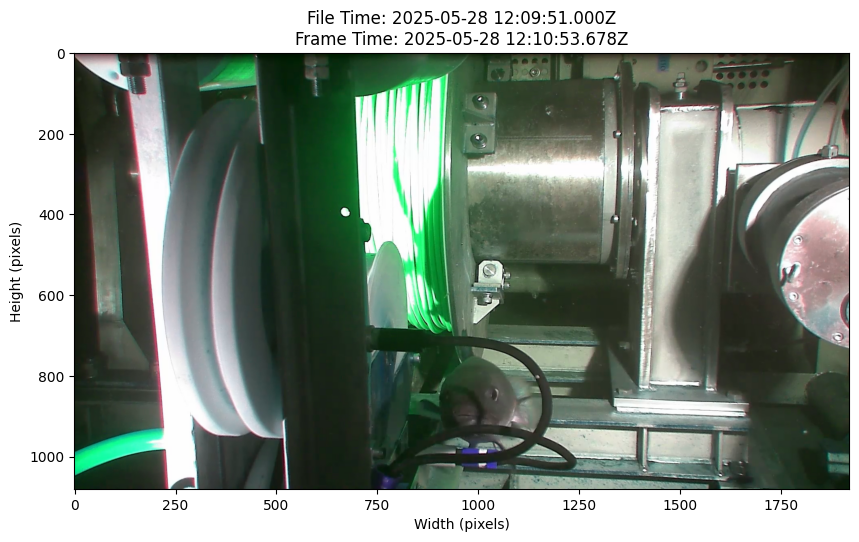

In [7]:
fig, ax = plt.subplots(1,1,figsize = (10,12))
ax.imshow(frame)
ax.set_xlabel('Width (pixels)')
ax.set_ylabel('Height (pixels)')
ax.set_title(f'File Time: {file_dt.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3] + 'Z'}\nFrame Time: {frame_time.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3] + 'Z'}')

In [8]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = int(frame_rate)
h,w,z = frame.shape # Get image shape from previous cell.
filepath = os.path.join(save_dir, 'example_bacvp_videocam.mp4')
writer = cv2.VideoWriter(filepath, fourcc, fps, (w, h))

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (255, 255, 255)
font_thickness = 2
text_position = (10, 30)

frame_idxs = range(900, 1051)  # Choose frames to write to a new video file.
for frame_idx in frame_idxs:
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = cap.read()
    frame_seconds = frame_idx / frame_rate
    frame_time = file_dt + timedelta(seconds=frame_seconds)
    frame_time_str = frame_time.strftime('%Y-%m-%dT%H:%M:%S.%f')[:-3] + 'Z'
    cv2.putText(frame, frame_time_str, text_position, font, font_scale, font_color, font_thickness, cv2.LINE_AA)
    writer.write(frame)
writer.release()